In [1]:
# duplicates needs dropping (probably based on headline and summary)

In [2]:
import sys
import os

import pandas as pd
import seaborn as sns

from database import database
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

from pprint import pprint

import gensim.corpora as corpora

import re

from nltk.stem import WordNetLemmatizer 

/Users/poswalabhishek/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
news_doc = []
for doc in database.news_collection.find({}):
    news_doc.append(doc)

In [4]:
news_df = pd.DataFrame(news_doc)
news_df.head()

,_id,datetime,headline,image,source,summary,url,api,counterparty,date,keyword_count,sentiment,category,id,related
0,616a9214d6b0969db79ff380,1634342006,"Dow Jones Futures: Microsoft, Tesla Rival Xpen...",https://s.yimg.com/uu/api/res/1.2/8E9xXtahKzzU...,Yahoo,"With a confirmed market rally, how aggressive ...",https://finnhub.io/api/news?id=0a71ef5127fb093...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
1,616a9214d6b0969db79ff381,1634345700,Tesla Will Probably Beat Earnings Estimates. W...,https://s.yimg.com/ny/api/res/1.2/Gc1PiHZWDkam...,Yahoo,Tesla will easily beat earnings expectations ...,https://finnhub.io/api/news?id=b21fa618c07df48...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
2,616a9214d6b0969db79ff382,1634342280,Musk Trolls Bezos Over Wealth. He Could have T...,https://s.yimg.com/ny/api/res/1.2/eLHfCjFR8LCr...,Yahoo,"In a tweet, the Tesla CEO drew attention to hi...",https://finnhub.io/api/news?id=e94ea5b855e79f8...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
3,616a9214d6b0969db79ff383,1634335078,'Big Short' investor Burry says he's no longer...,https://s.yimg.com/uu/api/res/1.2/BnJkedCmxSup...,Yahoo,Burry's Scion Asset Management said in a regul...,https://finnhub.io/api/news?id=d162aec79de9fdb...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
4,616a9214d6b0969db79ff384,1634335078,'Big Short' investor Burry says he's no longer...,https://static.reuters.com/resources/r/?m=02&d...,Reuters,"Investor Michael Burry of ""The Big Short"" fame...",https://finnhub.io/api/news?id=73b71d9c99019a1...,Finnhub,TSLA,2021-10-16,{},0.0,NaN,NaN,NaN


In [5]:
keywords = ["Ownership change", "Change of control", "Acceleration", "accelerate", "Default", "Insolvency", "Insolvent", "Delay", "Late", "Failure", "fail", "Dispute", "Liquidation", "Liquidator", "Margin call", "Haircut", "Bank run", "Termination", "Moratorium", "Suspension", "Suspend", "Fraud", "misrepresentation", "Fine", "sanction", "Breach", "Reschedule", "Restructuring", "Restructure", "Credit event", "Losses", "Loss", "Bailout", "Bailin", "Bankrupt", "Receivership", "Receiver", "Judicial Management", "Judicial Manager", "Administration", "Administrator", "Sequestrate", "Sequestration", "Support", "Capital call", "Liquidity event", "Negative trends", "Price changes", "Board infighting", "Corruption", "Inappropriate or ultra vires dealings", "Negative working capital", "Acquisition", "LBO", "Qualified audit opinion", "Regulatory breach", "Non-performing assets", "Provisions", "Force majeur", "Distress", "Frozen", "Delisted", "Sued", "Suit", "Arrested", "Disappeared", "Uncontactable"]

def keyword_count (news):
    keywords_count_dict = {}
    
    for keyword in keywords:
        for news_str in news:
            news_str = news_str.split()
            for word in news_str:
                if keyword == word:
                    keywords_count_dict[keyword] = keywords_count_dict.get(keyword, 0) + 1
    
    return keywords_count_dict

def plot_keyword_frequency (news_keyword_frequency):
    news_list = news_keyword_frequency.items()
    print(news_list)
#     news_list = sorted(news_list) 
    x, y = zip(*news_list) 

    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(x, y)
    plt.xticks(rotation='vertical')
    plt.show()
    
def keyword_wordcloud (text_string):
    wordcloud = WordCloud().generate(text_string)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

dict_items([('Acceleration', 12), ('accelerate', 50), ('Default', 47), ('Insolvency', 1), ('Delay', 87), ('Late', 301), ('Failure', 20), ('fail', 27), ('Dispute', 36), ('Liquidation', 1), ('Haircut', 1), ('Termination', 8), ('Suspension', 29), ('Suspend', 15), ('Fraud', 68), ('misrepresentation', 1), ('Fine', 117), ('sanction', 2), ('Breach', 38), ('Restructuring', 20), ('Restructure', 3), ('Losses', 390), ('Loss', 163), ('Bailout', 4), ('Bankrupt', 2), ('Receiver', 4), ('Administration', 65), ('Administrator', 1), ('Support', 350), ('Corruption', 3), ('Acquisition', 541), ('LBO', 3), ('Provisions', 3), ('Distress', 2), ('Frozen', 5), ('Delisted', 6), ('Sued', 45), ('Suit', 35), ('Arrested', 3)])


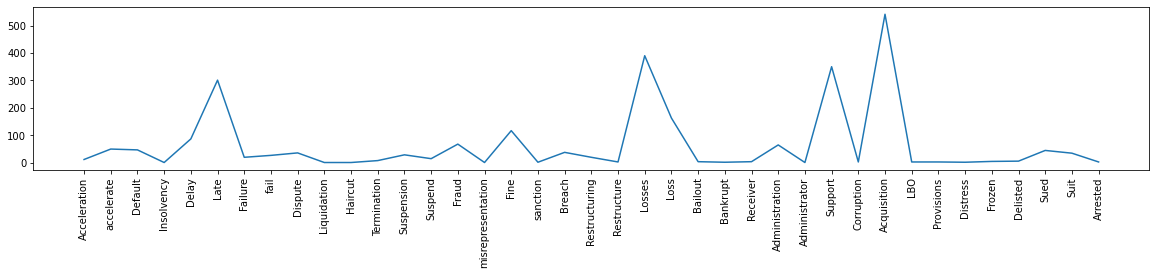

In [6]:
headline_keyword_frequency = keyword_count(news_df.headline)
plot_keyword_frequency(headline_keyword_frequency)

dict_items([('Acceleration', 13), ('accelerate', 406), ('Default', 10), ('Delay', 4), ('Late', 45), ('Failure', 3), ('fail', 67), ('Dispute', 4), ('Termination', 1), ('Moratorium', 4), ('Suspension', 9), ('Suspend', 1), ('Fraud', 7), ('misrepresentation', 1), ('Fine', 15), ('sanction', 8), ('Breach', 3), ('Restructuring', 2), ('Losses', 119), ('Loss', 62), ('Bankrupt', 2), ('Receiver', 1), ('Administration', 594), ('Administrator', 8), ('Support', 49), ('Corruption', 3), ('Acquisition', 256), ('LBO', 1), ('Frozen', 1), ('Sued', 88), ('Suit', 2), ('Arrested', 3)])


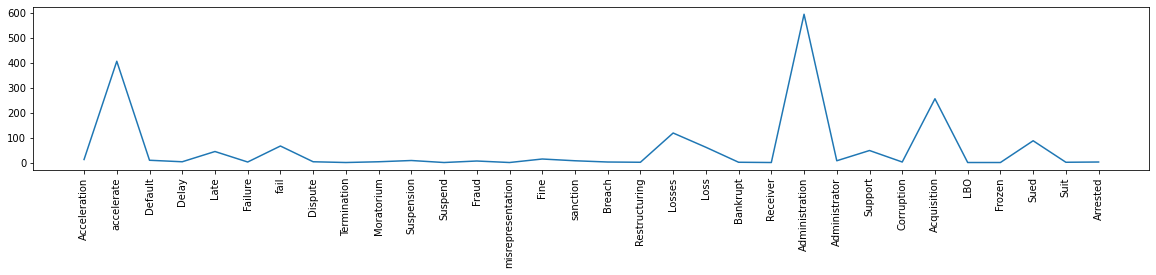

In [7]:
summary_keyword_frequency = keyword_count(news_df.summary)
plot_keyword_frequency(summary_keyword_frequency)

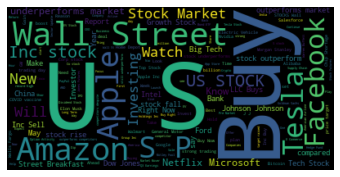

In [8]:
headline_text = " ".join(headline for headline in news_df.headline)
keyword_wordcloud(headline_text)

In [9]:
def counterparty_keyword_count (news_counterparty, target_counterparty: str):
    keywords_count_dict = {}
    
    target_news_headline = news_counterparty.loc[news_counterparty["counterparty"]==target_counterparty, "headline"]
    target_news_summary = news_counterparty.loc[news_counterparty["counterparty"]==target_counterparty, "summary"]


    for keyword in keywords:
        for news_str in target_news_summary:
            news_str = news_str.split()
            for word in news_str:
                if keyword == word:
                    keywords_count_dict[keyword] = keywords_count_dict.get(keyword, 0) + 1
    
    return keywords_count_dict

dict_items([('accelerate', 30), ('Delay', 2), ('Late', 4), ('Failure', 1), ('fail', 6), ('Fine', 2), ('Losses', 1), ('Loss', 6), ('Administration', 101), ('Administrator', 1), ('Acquisition', 37), ('Sued', 6)])


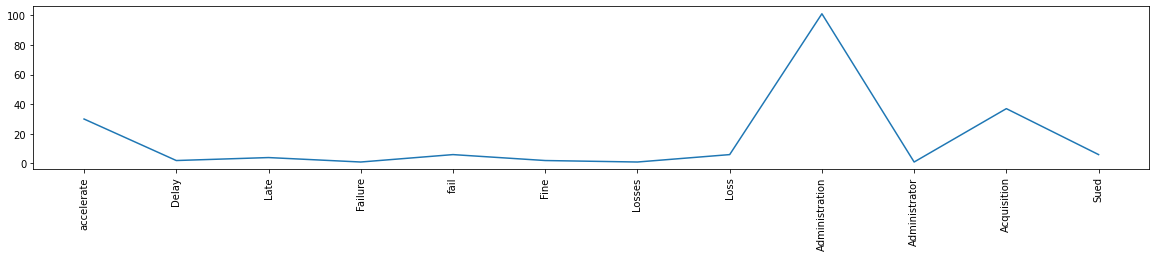

In [10]:
# graph for TSLA
plot_keyword_frequency(counterparty_keyword_count (news_df, 'TSLA'))

In [11]:
def counterparty_keyword_date_occurance (news_counterparty, target_counterparty: str, target_keyword: str):
    keywords_count_dict = {}
    keyword_count = 0
    
    target_news = news_counterparty.loc[news_counterparty["counterparty"]==target_counterparty]
    target_news = target_news[target_news['summary'].str.contains(target_keyword)]
    
    '''
    select a keyword
    check its frequency as we move along the x-axis
    see when what keyword appears
    connect with the frontend to make it interactive
    '''
#     print(target_news)
    for date in target_news['date']:
        keywords_count_dict[date] = keywords_count_dict.get(date, 0) + 1
        
    return keywords_count_dict

dict_items([('2021-10-13', 3), ('2021-10-09', 5), ('2021-10-08', 1), ('2021-10-04', 1), ('2021-09-28', 1), ('2021-09-21', 1), ('2021-09-09', 1), ('2021-09-07', 1), ('2021-08-31', 2), ('2021-08-30', 1), ('2021-08-11', 1), ('2021-08-10', 1), ('2021-08-09', 1), ('2021-07-25', 1), ('2021-07-20', 1), ('2021-07-14', 1), ('2021-06-16', 1), ('2021-06-09', 1), ('2021-05-26', 1), ('2021-05-19', 1), ('2021-05-11', 1), ('2021-05-10', 1), ('2021-05-06', 1), ('2021-04-29', 1), ('2021-03-08', 1), ('2021-03-03', 1), ('2021-02-23', 1), ('2021-02-17', 1), ('2021-02-09', 1), ('2021-02-08', 1), ('2021-01-19', 1), ('2021-01-13', 1), ('2020-12-29', 2), ('2020-12-04', 1), ('2020-11-20', 1), ('2020-11-18', 2), ('2020-11-06', 1), ('2020-10-22', 1), ('2021-11-11', 2), ('2021-12-01', 1), ('2021-12-15', 2), ('2021-12-16', 1), ('2021-12-08', 1), ('2021-11-22', 2), ('2021-11-10', 2), ('2021-11-09', 1), ('2021-12-23', 2)])


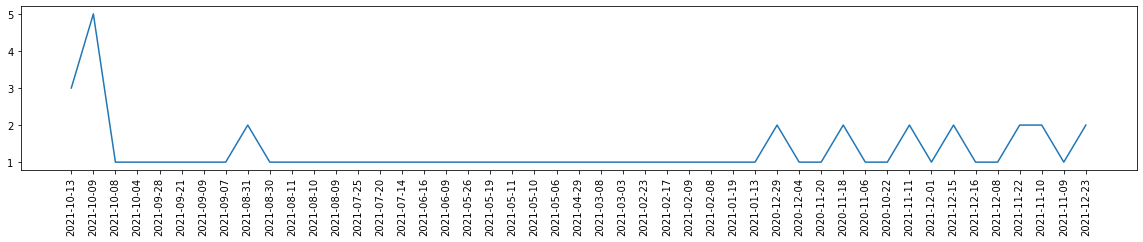

In [12]:
plot_keyword_frequency(counterparty_keyword_date_occurance (news_df, 'TSLA', 'accelerate'))

In [13]:
papers = news_df
papers.head()

,_id,datetime,headline,image,source,summary,url,api,counterparty,date,keyword_count,sentiment,category,id,related
0,616a9214d6b0969db79ff380,1634342006,"Dow Jones Futures: Microsoft, Tesla Rival Xpen...",https://s.yimg.com/uu/api/res/1.2/8E9xXtahKzzU...,Yahoo,"With a confirmed market rally, how aggressive ...",https://finnhub.io/api/news?id=0a71ef5127fb093...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
1,616a9214d6b0969db79ff381,1634345700,Tesla Will Probably Beat Earnings Estimates. W...,https://s.yimg.com/ny/api/res/1.2/Gc1PiHZWDkam...,Yahoo,Tesla will easily beat earnings expectations ...,https://finnhub.io/api/news?id=b21fa618c07df48...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
2,616a9214d6b0969db79ff382,1634342280,Musk Trolls Bezos Over Wealth. He Could have T...,https://s.yimg.com/ny/api/res/1.2/eLHfCjFR8LCr...,Yahoo,"In a tweet, the Tesla CEO drew attention to hi...",https://finnhub.io/api/news?id=e94ea5b855e79f8...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
3,616a9214d6b0969db79ff383,1634335078,'Big Short' investor Burry says he's no longer...,https://s.yimg.com/uu/api/res/1.2/BnJkedCmxSup...,Yahoo,Burry's Scion Asset Management said in a regul...,https://finnhub.io/api/news?id=d162aec79de9fdb...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
4,616a9214d6b0969db79ff384,1634335078,'Big Short' investor Burry says he's no longer...,https://static.reuters.com/resources/r/?m=02&d...,Reuters,"Investor Michael Burry of ""The Big Short"" fame...",https://finnhub.io/api/news?id=73b71d9c99019a1...,Finnhub,TSLA,2021-10-16,{},0.0,NaN,NaN,NaN


In [14]:
papers = papers.drop(columns=['_id', 'url', 'image', 'source', 'api'], axis=1).sample(100)
papers.reset_index(drop=True, inplace=True)
papers.head()

,datetime,headline,summary,counterparty,date,keyword_count,sentiment,category,id,related
0,1634646000,Dow Jones Futures Rally As Bitcoin ETF Debuts;...,Dow Jones futures rallied 200 points Tuesday w...,AAPL,2021-10-19,{},NaN,NaN,NaN,NaN
1,1623246781,Music Streaming Stocks to Watch as Distancing ...,"Here we pick four music streaming stocks, AAPL...",GOOG,2021-06-09,{},NaN,NaN,NaN,NaN
2,1635948002,Here's Why Advanced Micro Devices (AMD) is a S...,"Wondering how to pick strong, market-beating s...",AMD,2021-11-03,{},NaN,NaN,NaN,NaN
3,1639731741,Alibaba says to provide commerce segment earni...,China's Alibaba Group Holding Ltd will provide...,BABA,2021-12-17,{},NaN,NaN,NaN,NaN
4,1628135100,Former Bank of America traders convicted over ...,The proceeding was a test of prosecutors’ effo...,BAC,2021-08-05,{},NaN,NaN,NaN,NaN


In [15]:


papers['headline'] = papers['summary'].map(lambda x: re.sub('[,\.!?]', '', x))
papers['headline'] = papers['headline'].map(lambda x: x.lower())

papers['headline'].head()

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
/var/folders/8l/jn81tp550kgg0g40m3mj5g980000gn/T/ipykernel_17544/3064866186.py:1: DeprecationWarning: invalid escape sequence \.
  papers['headline'] = papers['summary'].map(lambda x: re.sub('[,\.!?]', '', x))


0    dow jones futures rallied 200 points tuesday w...
1    here we pick four music streaming stocks aapl ...
2    wondering how to pick strong market-beating st...
3    china's alibaba group holding ltd will provide...
4    the proceeding was a test of prosecutors’ effo...
Name: headline, dtype: object

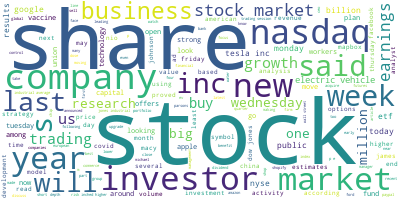

In [16]:

# Join the different processed headlines together.
long_string = ','.join(list(papers['headline'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)
wordcloud.to_image()

In [17]:
import gensim
from gensim.utils import simple_preprocess
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


def lemmatize (sentence):
    lemmatizer = WordNetLemmatizer()
    nltk.download('punkt')
    
    # Tokenize: Split the sentence into words
    word_list = nltk.word_tokenize(sentence)
    
    # Lemmatize list of words and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    print(lemmatized_output)
    #> The striped bat are hanging on their foot for best
    
    return lemmatized_output

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    refined_doc = []
    
    for doc in texts:
        refined_text = []
        for word in simple_preprocess(str(doc)):
            if word not in stop_words and len(word) > 4:
                refined_text.append(word)
        refined_doc.append(refined_text)
        
    return refined_doc
                
#     return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = papers.headline.values.tolist()

# still lemmatizing
# data = lemmatize(data)
data_words = list(sent_to_words(data))


# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:][0][:30])

['jones', 'futures', 'rallied', 'points', 'tuesday', 'first', 'bitcoin', 'debut', 'stocks', 'watch', 'include', 'nvidia']


In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [19]:
num_topics = 50

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(17,
  '0.023*"making" + 0.023*"proceeding" + 0.023*"activity" + '
  '0.023*"prosecutors" + 0.023*"predated" + 0.023*"spoofing" + 0.023*"illegal" '
  '+ 0.023*"punish" + 0.023*"efforts" + 0.022*"union"'),
 (23,
  '0.036*"quarter" + 0.036*"moran" + 0.036*"biggest" + 0.036*"gurufocus" + '
  '0.036*"written" + 0.036*"topic" + 0.036*"margaret" + 0.036*"sells" + '
  '0.036*"article" + 0.036*"update"'),
 (16,
  '0.052*"google" + 0.027*"company" + 0.025*"nasdaq" + 0.023*"internet" + '
  '0.016*"contributions" + 0.016*"reflect" + 0.016*"solid" + 0.016*"market" + '
  '0.016*"marvell" + 0.016*"markets"'),
 (42,
  '0.034*"jason" + 0.034*"least" + 0.034*"moser" + 0.017*"video" + '
  '0.017*"strong" + 0.017*"affirm" + 0.017*"highs" + 0.017*"rebound" + '
  '0.017*"later" + 0.017*"space"'),
 (35,
  '0.027*"censored" + 0.027*"eugene" + 0.027*"connection" + 0.027*"includes" + '
  '0.027*"banned" + 0.027*"banks" + 0.027*"technology" + 0.027*"acquire" + '
  '0.027*"banking" + 0.027*"direct"'),
 (38,
  '

In [20]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds')
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/poswalabhishek/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/poswalabhishek/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/poswalabhishek/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/poswalabhishek/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10     0.351227  0.029307       1        1  5.780148
15    -0.052723 -0.238160       2        1  5.212445
22    -0.092257 -0.294047       3        1  5.146161
33    -0.179139 -0.293696       4        1  5.029451
8      0.178050 -0.275990       5        1  4.735772
12     0.326999 -0.120458       6        1  4.325971
16    -0.272412 -0.111274       7        1  3.426451
18     0.240279 -0.162895       8        1  3.360824
2     -0.151514  0.317395       9        1  3.295274
13     0.253885  0.206533      10        1  2.838741
39    -0.208453 -0.200326      11        1  2.831182
0     -0.301574 -0.036913      12        1  2.774508
48    -0.245795  0.066256      13        1  2.707360
24     0.178090  0.238622      14        1  2.700203
42    -0.299443  0.074490      15        1  2.700203
11    -0.145345  0.219600      16        1  2.699969
4     -0.163228  0.050603      17        1  2.364790
9      0.230983  0.104927      18        1  2.298794
40    -0.194859 -0.082025      19        1  2.238404
44     0.112336 -0.123667      20        1  2.194500
5      0.059534 -0.244614      21        1  2.049895
1     -0.029679 -0.127844      22        1  1.974912
43     0.132743 -0.094548      23        1  1.922953
27     0.132152 -0.228433      24        1  1.794924
49    -0.027920  0.263836      25        1  1.779146
6      0.001178 -0.206388      26        1  1.779146
46    -0.210825  0.162527      27        1  1.777626
34     0.051878  0.263033      28        1  1.713270
47    -0.140181 -0.131126      29        1  1.573107
37    -0.057425  0.183638      30        1  1.375349
35    -0.122225  0.138477      31        1  1.318573
32     0.095594  0.237014      32        1  1.253440
21     0.172859 -0.037240      33        1  1.111888
28     0.133811  0.097019      34        1  1.073510
19     0.029214  0.020211      35        1  1.046080
38     0.050585 -0.069016      36        1  0.848883
7      0.052768  0.109910      37        1  0.848883
41    -0.045354  0.025456      38        1  0.848883
45     0.078186  0.005058      39        1  0.732146
30    -0.064875  0.045065      40        1  0.717707
23     0.079689  0.060303      41        1  0.717707
36     0.222363 -0.018898      42        1  0.717707
17    -0.022876  0.158489      43        1  0.652257
26    -0.007708 -0.023932      44        1  0.456937
20    -0.022406 -0.001801      45        1  0.392460
25    -0.008912  0.044533      46        1  0.392460
14    -0.001778  0.013875      47        1  0.117251
31    -0.001778  0.013875      48        1  0.117251
29    -0.001778  0.013875      49        1  0.117251
3     -0.091942 -0.040640      50        1  0.117251, topic_info=          Term       Freq      Total Category  logprob  loglift
89       stock  13.000000  13.000000  Default  30.0000  30.0000
22      market  14.000000  14.000000  Default  29.0000  29.0000
53     company  14.000000  14.000000  Default  28.0000  28.0000
9       stocks  10.000000  10.000000  Default  27.0000  27.0000
157     shares  14.000000  14.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
145   election   0.017598   1.870439  Topic50  -4.6139   2.0825
288     recent   0.024043   2.642694  Topic50  -4.3018   2.0489
430   thursday   0.020491   3.331100  Topic50  -4.4617   1.6575
150  wednesday   0.021705   5.398599  Topic50  -4.4041   1.2322
170      based   0.019267   3.529838  Topic50  -4.5233   1.5380

[2075 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
849       3  0.803346      ability
132       4  0.702637   accelerate
379       6  0.785189  accessories
71        6  0.299092    according
71       13  0.299092    according
...     ...       ...          ...
681       9  0.494480        yemen
447      16  0.740490        yield
448      16  0.740494       yields
265      2

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/poswalabhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
news_df

,_id,datetime,headline,image,source,summary,url,api,counterparty,date,keyword_count,sentiment,category,id,related
0,616a9214d6b0969db79ff380,1634342006,"Dow Jones Futures: Microsoft, Tesla Rival Xpen...",https://s.yimg.com/uu/api/res/1.2/8E9xXtahKzzU...,Yahoo,"With a confirmed market rally, how aggressive ...",https://finnhub.io/api/news?id=0a71ef5127fb093...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
1,616a9214d6b0969db79ff381,1634345700,Tesla Will Probably Beat Earnings Estimates. W...,https://s.yimg.com/ny/api/res/1.2/Gc1PiHZWDkam...,Yahoo,Tesla will easily beat earnings expectations ...,https://finnhub.io/api/news?id=b21fa618c07df48...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
2,616a9214d6b0969db79ff382,1634342280,Musk Trolls Bezos Over Wealth. He Could have T...,https://s.yimg.com/ny/api/res/1.2/eLHfCjFR8LCr...,Yahoo,"In a tweet, the Tesla CEO drew attention to hi...",https://finnhub.io/api/news?id=e94ea5b855e79f8...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
3,616a9214d6b0969db79ff383,1634335078,'Big Short' investor Burry says he's no longer...,https://s.yimg.com/uu/api/res/1.2/BnJkedCmxSup...,Yahoo,Burry's Scion Asset Management said in a regul...,https://finnhub.io/api/news?id=d162aec79de9fdb...,Finnhub,TSLA,2021-10-16,{},NaN,NaN,NaN,NaN
4,616a9214d6b0969db79ff384,1634335078,'Big Short' investor Burry says he's no longer...,https://static.reuters.com/resources/r/?m=02&d...,Reuters,"Investor Michael Burry of ""The Big Short"" fame...",https://finnhub.io/api/news?id=73b71d9c99019a1...,Finnhub,TSLA,2021-10-16,{},0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227224,61d291fd350f0214a826fb88,1641104400,Could This FDA Approval Create a Blockbuster D...,https://www.nasdaq.com/sites/acquia.prod/files...,Nasdaq,"On Dec. 14, the U.S. Food and Drug Administrat...",https://finnhub.io/api/news?id=b01af8c6fbd0407...,Finnhub,YUSG,2022-01-02,NaN,NaN,company,87243792.0,YUSG
227225,61d291fd350f0214a826fb89,1641104100,Want to Build Life-Changing Wealth? 2 Unstoppa...,https://www.nasdaq.com/sites/acquia.prod/files...,Nasdaq,Day trading is often portrayed in a glamorous ...,https://finnhub.io/api/news?id=c674a00370bc34f...,Finnhub,YUSG,2022-01-02,NaN,NaN,company,87240039.0,YUSG
227226,61d291fd350f0214a826fb8a,1641103800,3 Reopening Stocks to Counter Inflation,https://www.nasdaq.com/sites/acquia.prod/files...,Nasdaq,The coronavirus pandemic is causing shortages ...,https://finnhub.io/api/news?id=8fd35ead6bf5d36...,Finnhub,YUSG,2022-01-02,NaN,NaN,company,87240040.0,YUSG
227227,61d291fd350f0214a826fb8b,1641103620,"Where to Invest $100,000 in 2022",https://www.nasdaq.com/sites/acquia.prod/files...,Nasdaq,We're heading into the third year of the coron...,https://finnhub.io/api/news?id=754c7998883af6b...,Finnhub,YUSG,2022-01-02,NaN,NaN,company,87237508.0,YUSG


In [78]:
# nltk.download('wordnet')
X_train, X_hold = train_test_split(news_df, test_size=0.6, random_state=111)

stemmer = WordNetLemmatizer()

def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 4) ] 
    stems = [stemmer.lemmatize(item) for item in tokens]
    return stems

vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words='english', max_df=0.75, min_df=50, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(X_train.summary) 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/poswalabhishek/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [56]:
tf_vectors.A
vectorizer_tf.get_feature_names()

["'influencers",
 '/prnewswire/',
 '1,000',
 '10,000',
 '10-year',
 '100,000',
 '12-month',
 '2,000',
 '2019.',
 '2020-2024',
 '2020.',
 '2021.',
 '2021q3',
 '2022.',
 '3,000',
 '3-months',
 '30years',
 '5,000',
 '50,000',
 '500,000',
 '52-week',
 '^gspc',
 '^ixic',
 'ability',
 'abuse',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accenture',
 'accept',
 'accepting',
 'access',
 'accessible',
 'accesswire',
 'accommodative',
 'according',
 'account',
 'accounting',
 'accounts',
 'accuracy',
 'accused',
 'accusing',
 'achieve',
 'achieved',
 'acquire',
 'acquired',
 'acquiring',
 'acquisition',
 'acquisitions',
 'action',
 'actions',
 'active',
 'actively',
 'activision',
 'activist',
 'activities',
 'activity',
 'actor',
 'actually',
 'adami',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'adjusted',
 'administration',
 'adobe',
 'adoption',
 'adults',
 'advance',
 'advanced',
 'advancing',
 'advantage',
 'advantages',
 'advertise

In [64]:
lda = decomposition.LatentDirichletAllocation(n_components=50,\
                                              max_iter=3, learning_method='online',\
                                              learning_offset=50, n_jobs=-1,\
                                              random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

W1

array([[0.02      , 0.02      , 0.02      , ..., 0.02      , 0.02      ,
        0.02      ],
       [0.004     , 0.004     , 0.004     , ..., 0.004     , 0.004     ,
        0.004     ],
       [0.00666667, 0.00666667, 0.00666667, ..., 0.00666667, 0.00666667,
        0.00666667],
       ...,
       [0.0025    , 0.1275    , 0.0025    , ..., 0.0025    , 0.1275    ,
        0.0025    ],
       [0.071063  , 0.00074074, 0.00074074, ..., 0.00074074, 0.00074074,
        0.00074074],
       [0.00285714, 0.00285714, 0.00285714, ..., 0.00285714, 0.00285714,
        0.00285714]])

In [65]:
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

topics

['public amazon.com company future offering plans valuation automotive initial rivian number launch risks startup consider',
 'microsoft chinese online giant media social according company platforms network shopping corporate comes tuesday instagram',
 'called allow announcement learn listing effective challenge direct problem items photo locations slide simple completed',
 'dipped 2020-2024 sexual described virgin paper ebrahim blizzard yasin hertz resistance small-cap newspaper combustion galactic',
 'global semiconductor chief markets executive shortage production economy manufacturing officer industry intel travel plant chips',
 'million changes today shares looking symbol dollar increase outstanding channel universe mastercard giving covered season',
 'apple amazon recent capital e-commerce iphone company start investors long-term weeks opportunity despite getting position',
 'showed adjusted showing beginning thousands respectively hundreds announcing christmas sparked pharmacy t

In [66]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.summary))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic41,Topic42,Topic43,Topic44,Topic45,Topic46,Topic47,Topic48,Topic49,dominant_topic
Doc0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0
Doc1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41
Doc2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.34,0.34,0.01,0.01,0.01,0.01,0.01,43
Doc3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,10
Doc4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc90886,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0
Doc90887,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25
Doc90888,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,21
Doc90889,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,22


In [67]:
X_train.head()

,_id,datetime,headline,image,source,summary,url,api,counterparty,date,keyword_count,sentiment,category,id,related
178439,61cd5020350f0214a8bd7307,1613520000,Global Retail Market Report 2021: COVID-19 Imp...,https://mms.businesswire.com/media/20210217005...,businesswire,The,https://finnhub.io/api/news?id=1f083f35ca30ce7...,Finnhub,AMZN,2021-02-17,{},NaN,NaN,NaN,NaN
210380,61cd5178350f0214a8beb388,1618803360,"Dow Rally Takes Breather as Consumer, Tech Sto...",https://i-invdn-com.akamaized.net/news/LYNXNPE...,Investing.com,"Dow Rally Takes Breather as Consumer, Tech Sto...",https://finnhub.io/api/news?id=05e8991573f23ca...,Finnhub,BAC,2021-04-19,{},NaN,NaN,NaN,NaN
82643,61cd4bc4350f0214a8b98466,1627980360,"Ford, GM, Stellantis reinstate mask mandates i...",,Thefly.com,"The COVID-19 Joint Task F... F, GM, STLA",https://finnhub.io/api/news?id=5157eb760054aef...,Finnhub,F,2021-08-03,{},NaN,NaN,NaN,NaN
155379,61cd4ef3350f0214a8bc7753,1613288700,3 Embarrassingly Cheap Dividend Stocks,https://www.nasdaq.com/sites/acquia.prod/files...,Nasdaq,Keeping track of all the market developments o...,https://finnhub.io/api/news?id=b854528897f3b04...,Finnhub,CSCO,2021-02-14,{},NaN,NaN,NaN,NaN
213566,61cd51b2350f0214a8bedef8,1638774000,Quantifying Bubble Risk: Market Vs. Top 100 S&...,https://static.seekingalpha.com/cdn/s3/uploads...,SeekingAlpha,I have been thinking about Bubble Risk. My vie...,https://finnhub.io/api/news?id=06cc5f6de04da92...,Finnhub,WFC,2021-12-06,{},NaN,NaN,NaN,NaN


In [81]:
WHold = lda.transform(vectorizer_tf.transform(X_hold.summary[:5]))

ValueError: X has 3068 features, but LatentDirichletAllocation is expecting 3316 features as input.

In [ ]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold.summary[:5]))]
df_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

df_doc_topic

In [71]:
X_hold

,_id,datetime,headline,image,source,summary,url,api,counterparty,date,keyword_count,sentiment,category,id,related
83763,61cd4bc4350f0214a8b989b7,1620824680,"U.S. and Mexico target GM labor 'violations,' ...",https://www.nasdaq.com/sites/acquia.prod/files...,Nasdaq,The United States is testing powers to protect...,https://finnhub.io/api/news?id=efba234dddc32ff...,Finnhub,F,2021-05-12,{},NaN,NaN,NaN,NaN
123585,61cd4da8350f0214a8bb3704,1621741854,Outperforming The S&P 500 By Trading The Top 1...,https://static.seekingalpha.com/cdn/s3/uploads...,SeekingAlpha,Click here to know how to outperform the S&P 5...,https://finnhub.io/api/news?id=9ff5a4e7348db2b...,Finnhub,GOOG,2021-05-23,{},NaN,NaN,NaN,NaN
86287,61cd4bf2350f0214a8b9ad23,1640527200,Are roller coaster EV stocks too much for you ...,https://s.yimg.com/uu/api/res/1.2/Ai7IDgw4.iSD...,Yahoo,These auto industry players are returning mean...,https://finnhub.io/api/news?id=9818161097b9864...,Finnhub,NIO,2021-12-26,{},NaN,NaN,NaN,NaN
159831,61cd4f35350f0214a8bcac91,1624607951,Wall Street Breakfast: 'We Have A Deal' (Podcast),https://static3.seekingalpha.com/assets/podcas...,SeekingAlpha,Our top stories today: ‘We have a deal’; key i...,https://finnhub.io/api/news?id=38942c0c1958991...,Finnhub,PYPL,2021-06-25,{},NaN,NaN,NaN,NaN
86440,61cd4bf2350f0214a8b9adcf,1638955200,From Lucid To ChargePoint -- 3 Renewable Growt...,https://www.nasdaq.com/sites/acquia.prod/files...,Nasdaq,The Nasdaq sell-off is bringing once high-flyi...,https://finnhub.io/api/news?id=343decad32f7501...,Finnhub,NIO,2021-12-08,{},NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161695,61cd4f4e350f0214a8bcc154,1635403440,This Stock Has Been a Big Winner and Could Sti...,https://www.nasdaq.com/sites/acquia.prod/files...,Nasdaq,"With a return of 2,400% since its 2016 IPO, ad...",https://finnhub.io/api/news?id=07e37ca930b3fb4...,Finnhub,SHOP,2021-10-28,{},NaN,NaN,NaN,NaN
97287,61cd4c62350f0214a8ba1879,1627637400,Nvidia Stock In 10 Years: What You Should Cons...,https://static.seekingalpha.com/cdn/s3/uploads...,SeekingAlpha,NVIDIA has been an outstanding investment over...,https://finnhub.io/api/news?id=6554e8304dc5c85...,Finnhub,TSM,2021-07-30,{},NaN,NaN,NaN,NaN
2296,616a921ad6b0969db7a01e32,1630627200,Elon Musk says he prefers to ‘stay out of poli...,https://s.yimg.com/ny/api/res/1.2/achSf1aKdisv...,Yahoo,"Elon Musk said Thursday he ""would prefer to st...",https://finnhub.io/api/news?id=902f4cbb16c8daa...,Finnhub,TSLA,2021-09-03,{},NaN,NaN,NaN,NaN
209255,61cd5177350f0214a8beae33,1627387200,Key Dividend Increases from Last Week Includin...,,TalkMarkets,,https://finnhub.io/api/news?id=72092fa2b9fe853...,Finnhub,BAC,2021-07-27,{},NaN,NaN,NaN,NaN
